# Build Model

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Neuron definition

In [2]:
class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.uniform(size=num_inputs)
        self.bias = np.random.uniform()

    def activate(self, inputs):
        self.inputs = inputs
        self.output = self.sigmoid(np.dot(inputs, self.weights) + self.bias)
        return self.output

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self):
        return self.output * (1 - self.output)

    def update_weights(self, delta, learning_rate):
        self.weights += learning_rate * delta * self.inputs
        self.bias += learning_rate * delta

## Layer definition

In [3]:
class Layer:
    def __init__(self, num_neurons, num_inputs_per_neuron):
        self.neurons = [Neuron(num_inputs_per_neuron) for _ in range(num_neurons)]

    def forward(self, inputs):
        return np.array([neuron.activate(inputs) for neuron in self.neurons])

    def backward(self, errors, learning_rate):
        deltas = []
        for i, neuron in enumerate(self.neurons):
            delta = errors[i] * neuron.sigmoid_derivative()
            neuron.update_weights(delta, learning_rate)
            deltas.append(delta)
        return np.dot(np.array([neuron.weights for neuron in self.neurons]).T, deltas)

## Neural Network definition

In [4]:
class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.layers = []

        # Initialize layers
        for i in range(len(layers) - 1):
            self.layers.append(Layer(layers[i+1], layers[i]))

    def train(self, inputs, outputs):
        for epoch in range(self.epochs):
            total_error = 0
            for x, y in zip(inputs, outputs):
                # Forward pass
                activations = [x]
                for layer in self.layers:
                    activations.append(layer.forward(activations[-1]))

                # Calculate error
                output_errors = y - activations[-1]
                total_error += np.sum(output_errors ** 2)

                # Backward pass
                errors = output_errors
                for i in reversed(range(len(self.layers))):
                    errors = self.layers[i].backward(errors, self.learning_rate)

            # Print MSE every 1000 epochs
            if epoch % 1000 == 0:
                mse = total_error / len(inputs)
                print(f'Epoch {epoch}, MSE: {mse}')

    def predict(self, inputs):
        activations = inputs
        for layer in self.layers:
            activations = layer.forward(activations)
        return activations

# Initialization and Training

## Training Data preperation

In [5]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

## Train model

In [6]:
# Initialize the neural network with an input layer, one hidden layer, and an output layer
layers = [2,2,1]  # 2 input neurons, 2 neurons in hidden layer, 1 output neuron
nn = NeuralNetwork(layers,0.1,10000)

# Train the neural network
nn.train(inputs, outputs)

Epoch 0, MSE: 0.31717307811644857
Epoch 1000, MSE: 0.24818954390821452
Epoch 2000, MSE: 0.22774775011634513
Epoch 3000, MSE: 0.18910391921859943
Epoch 4000, MSE: 0.1482752185806958
Epoch 5000, MSE: 0.041664464539261425
Epoch 6000, MSE: 0.01447421680794056
Epoch 7000, MSE: 0.008000836045941647
Epoch 8000, MSE: 0.005381826288133164
Epoch 9000, MSE: 0.004006406802049665


# Evaluation

## Simple test

In [7]:
# Test the neural network
predicted_output = np.array([nn.predict(x) for x in inputs])
print("Predicted Output:\n", predicted_output)

Predicted Output:
 [[0.05771453]
 [0.94591799]
 [0.94580431]
 [0.05895737]]


## Visualization

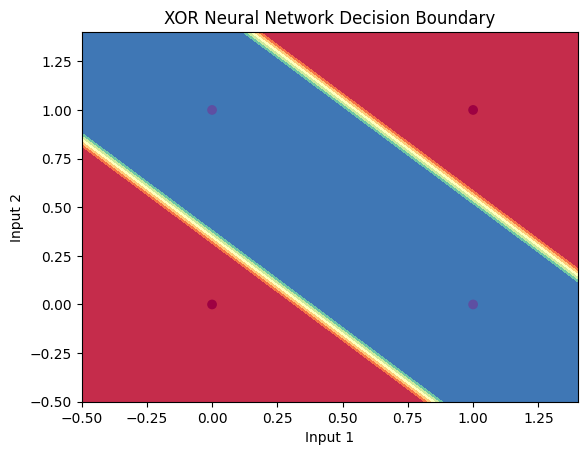

Accuracy: 1.0


In [8]:
# Round the predicted output to get binary predictions
predicted_output_binary = np.round(predicted_output)

# Plot the decision boundary
x_min, x_max = inputs[:, 0].min() - 0.5, inputs[:, 0].max() + 0.5
y_min, y_max = inputs[:, 1].min() - 0.5, inputs[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.array([nn.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = np.round(Z.reshape(xx.shape))

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs.ravel(), cmap=plt.cm.Spectral)
plt.title("XOR Neural Network Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()

# Print the accuracy
accuracy = np.mean(predicted_output_binary.ravel() == outputs.ravel())
print("Accuracy:", accuracy)
